
    
# Inteligencia Artificial

## Arboles de Decision Covid 19

## Rodriguez Rivas Jose Gabriel

## Zamora Guerrero Jose Angel



In [106]:
import pandas as pd

#create a pandas dataframe called "training" from the titanic-train.csv file
training = pd.read_csv("200723COVID19MEXICO.csv",  encoding= 'unicode_escape')

In [107]:
training

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-07-23,1162e9,2,4,9,2,20,9,2,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
1,2020-07-23,0e50ac,2,4,9,2,9,9,5,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
2,2020-07-23,1dd91c,2,4,8,1,8,8,37,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
3,2020-07-23,1ad302,2,4,30,1,30,30,44,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
4,2020-07-23,1dd6f1,2,3,15,2,15,15,106,2,...,2,2,2,2,1,1,99,MÃ©xico,99,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879603,2020-07-23,1af1ae,1,12,19,2,19,19,39,1,...,2,2,2,2,1,3,99,MÃ©xico,99,97
879604,2020-07-23,193226,1,3,26,2,26,26,30,2,...,2,1,2,1,1,3,99,MÃ©xico,99,2
879605,2020-07-23,0fe94e,2,12,24,1,24,24,28,1,...,1,2,2,2,2,3,99,MÃ©xico,99,97
879606,2020-07-23,118851,2,12,9,1,9,9,5,1,...,2,2,2,2,2,3,99,MÃ©xico,99,97


In [108]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879608 entries, 0 to 879607
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   FECHA_ACTUALIZACION  879608 non-null  object
 1   ID_REGISTRO          879608 non-null  object
 2   ORIGEN               879608 non-null  int64 
 3   SECTOR               879608 non-null  int64 
 4   ENTIDAD_UM           879608 non-null  int64 
 5   SEXO                 879608 non-null  int64 
 6   ENTIDAD_NAC          879608 non-null  int64 
 7   ENTIDAD_RES          879608 non-null  int64 
 8   MUNICIPIO_RES        879608 non-null  int64 
 9   TIPO_PACIENTE        879608 non-null  int64 
 10  FECHA_INGRESO        879608 non-null  object
 11  FECHA_SINTOMAS       879608 non-null  object
 12  FECHA_DEF            879608 non-null  object
 13  INTUBADO             879608 non-null  int64 
 14  NEUMONIA             879608 non-null  int64 
 15  EDAD                 879608 non-nu

In [109]:
training.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-07-23,1162e9,2,4,9,2,20,9,2,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
1,2020-07-23,0e50ac,2,4,9,2,9,9,5,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
2,2020-07-23,1dd91c,2,4,8,1,8,8,37,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
3,2020-07-23,1ad302,2,4,30,1,30,30,44,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
4,2020-07-23,1dd6f1,2,3,15,2,15,15,106,2,...,2,2,2,2,1,1,99,MÃ©xico,99,2


In [110]:
training ['vive'] = training['FECHA_DEF'].apply(lambda toLabel: 0 if toLabel =='9999-99-99' else 1)

In [111]:
y_target = training["vive"].values

In [112]:
training.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,vive
0,2020-07-23,1162e9,2,4,9,2,20,9,2,1,...,2,2,2,99,1,99,MÃ©xico,99,97,0
1,2020-07-23,0e50ac,2,4,9,2,9,9,5,2,...,1,2,2,99,1,99,MÃ©xico,99,2,0
2,2020-07-23,1dd91c,2,4,8,1,8,8,37,2,...,1,2,2,99,1,99,MÃ©xico,99,2,1
3,2020-07-23,1ad302,2,4,30,1,30,30,44,1,...,2,2,2,99,1,99,MÃ©xico,99,97,0
4,2020-07-23,1dd6f1,2,3,15,2,15,15,106,2,...,2,2,2,1,1,99,MÃ©xico,99,2,0


In [113]:
columns = ["EDAD", "SEXO", "OBESIDAD", "DIABETES","HIPERTENSION","NEUMONIA","INTUBADO" ,"UCI","EPOC","ASMA","INMUSUPR","CARDIOVASCULAR",
           "EMBARAZO","TABAQUISMO","RENAL_CRONICA"]

X_input = training[list(columns)].values

In [114]:
from sklearn import tree
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf_train = clf_train.fit(X_input, y_target)

In [115]:
clf_train.score(X_input,y_target)

0.9433054269629199

In [116]:
designacion=['vivio', 'no vivio']

In [117]:
import sklearn
#from sklearn.externals.six import StringIO
with open("imgCV19.dot", 'w') as f:
  A = tree.export_graphviz(clf_train, out_file=f, feature_names=columns, class_names=designacion)

In [118]:
!dot -Tpng imgCV19.dot -o imgCV19.png

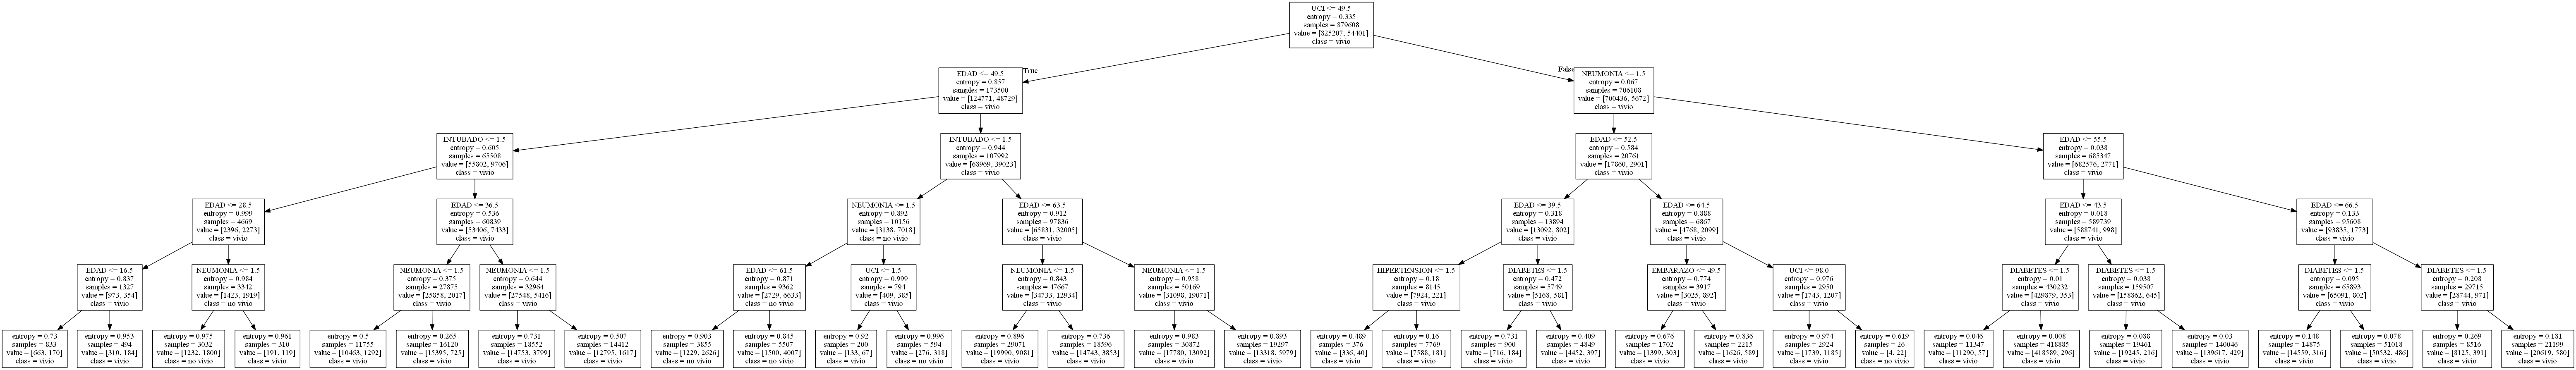

In [119]:
from IPython.display import Image
Image("imgCV19.png")

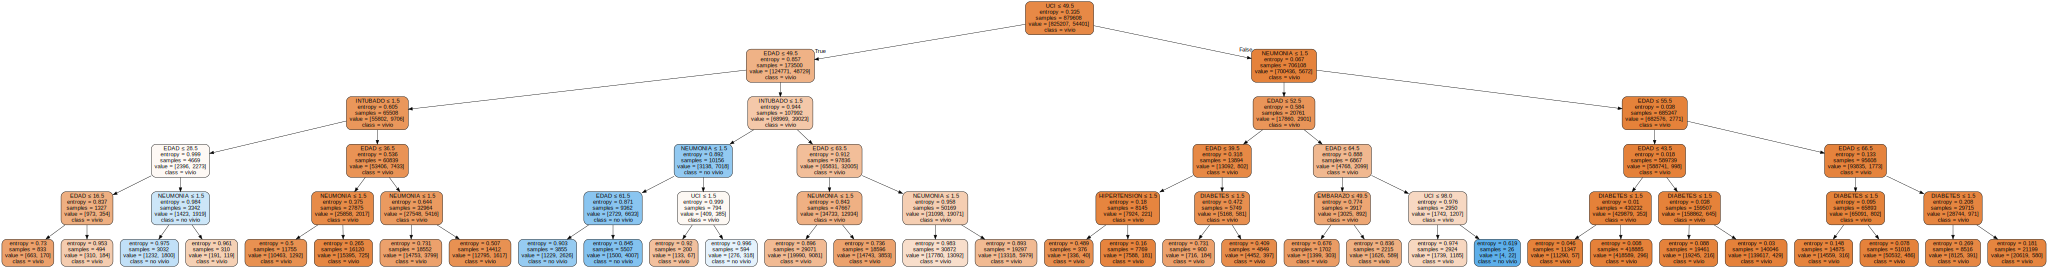

In [120]:
import graphviz
dot_data = tree.export_graphviz(clf_train, out_file=None,   
                         class_names=designacion,
                         feature_names=columns,
                         filled=True, rounded=True,
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("CV19Color", format='png')
graph

In [121]:
y_target = training["vive"].values

In [122]:
columns = ["EDAD", "SEXO", "OBESIDAD", "DIABETES","HIPERTENSION","CARDIOVASCULAR","EPOC","ASMA","INMUSUPR",
           "EMBARAZO","TABAQUISMO","RENAL_CRONICA"]

X_input = training[list(columns)].values

In [123]:
from sklearn import tree
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf_train = clf_train.fit(X_input, y_target)

In [124]:
clf_train.score(X_input,y_target)

0.9381531318496421

In [125]:
designacion=['vivio', 'no vivio']

In [130]:
import sklearn
with open("img2CV19.dot", 'w') as f:
  A = tree.export_graphviz(clf_train, out_file=f, feature_names=columns, class_names=designacion)

In [133]:
!dot -Tpng img2CV19.dot -o img2CV19.png

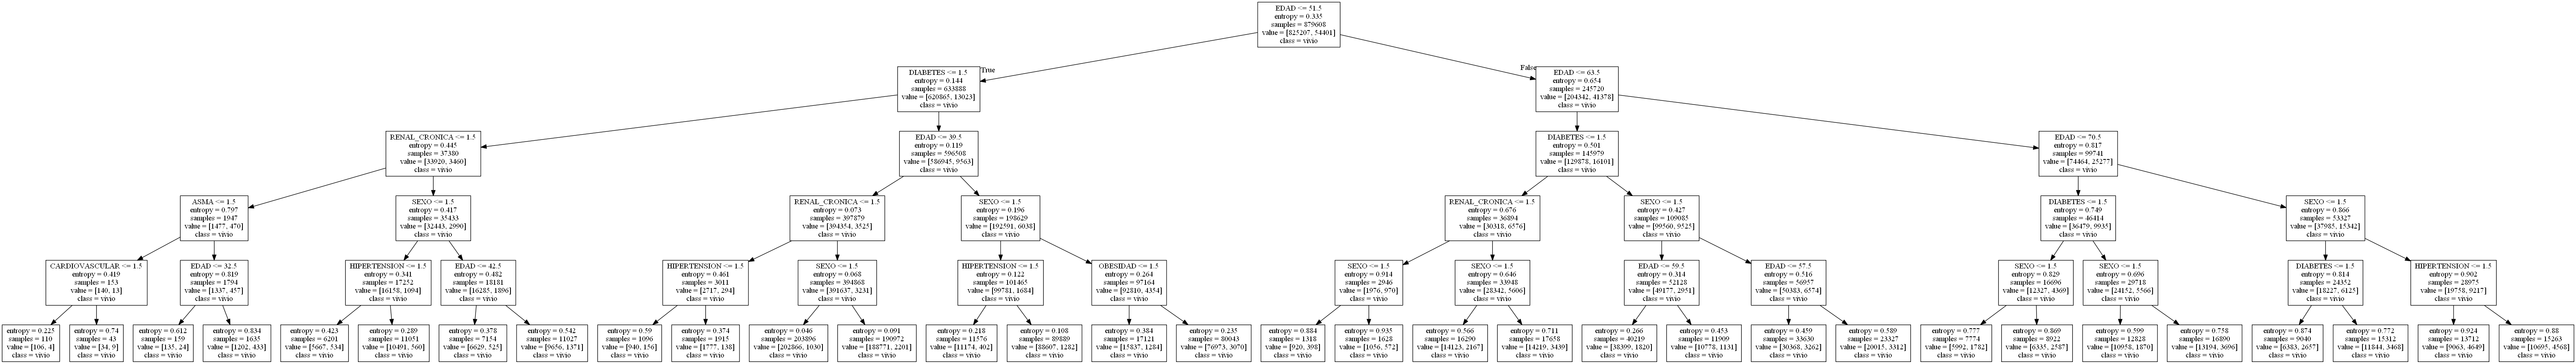

In [134]:
from IPython.display import Image
Image("img2CV19.png")

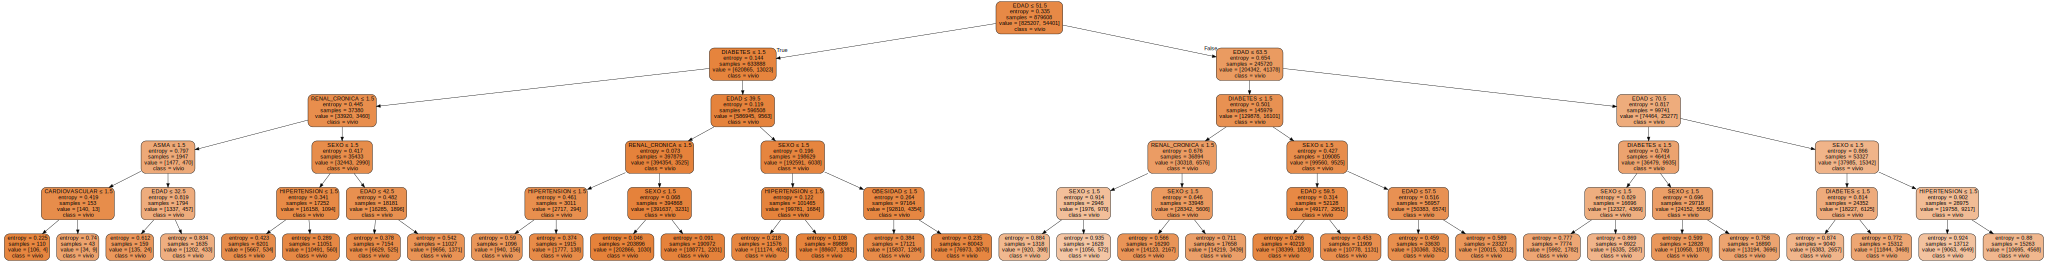

In [135]:
import graphviz
dot_data = tree.export_graphviz(clf_train, out_file=None,   
                         class_names=designacion,
                         feature_names=columns,
                         filled=True, rounded=True,
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("CV19Color2", format='png')
graph

## Conclusion
Por lo que obsercve definitivamente en el segundo resultado en donde ejecuto el programa sin estos datos  UCI, Neumonia e INTUBADO , las personas sobrevivieron mas, al contrario de la primera ejecicion donde estos datos si lo estaban.